# Exploring the Socio-Economic Determinants of Deliberate Arson in London Wards: A Cluster Analysis Approach

All data and codes can be found [here](https://github.com/KKKKKennyy/CASA0006_Ass)

# 1. Introduction

Deliberate arson is a major problem in the UK. According to the National Fire Chiefs Council (NFCC) statement, deliberate arson has impacted on the communities in which people work and live, and has had an impact on limiting the local environment and the economic viability of the country (NFCC, 2020). Furthermore, the NFCC statement (2020) refers to deliberate fires accounting for the largest proportion of fires attended by the UK fire and rescue services. According to The Home Office, the number of total deliberate arsons in England reached another peak since 2019 in 2022 at 79,990 cases (GOV.UK). These arsons also cost an estimated £1.49bn on an economic level and resulted in 181 people losing their lives (Arch Insurance, 2024). Deliberate arson is therefore a serious concern in the UK.

**Literature Review**

Deliberate arson encompasses fires set intentionally for various reasons, and research has explored this phenomenon both at individual and macro levels. Studies at the individual level have delved into the psychological and criminological aspects of arsonists. For instance, Johnson and Netherton (2017) found that arsonists often commit arson due to factors other than pyromania, such as anxiety. Similarly, Barrowcliffe and Gannon (2015) identified that 17.78% of arsonists, who were not arrested but admitted to deliberate arson, reported mental illnesses. These studies highlight the significant link between arson and psychiatric conditions. Another study by Butler and Grannon (2020) demonstrated, using linear regression, that arsonists’ identification with fire significantly predicts their fire-setting behaviors. Walsh et al. (2011) focused on adolescents and concluded that motivation was a crucial factor in deliberate arson. However, these individual studies often rely on self-reported data, including inputs from social platforms like Twitter, which could bias the results.

On a broader scale, macro-level studies have investigated the factors influencing arson from a demographic and environmental perspective. Ganteanme et al. (2012) analysed the causes of forest fire ignitions across Europe in 2012, emphasising the role of human activities in densely populated areas. The Federal Emergency Management Agency (1997) explored how socio-economic factors like housing, education, poverty, and substance abuse correlate with fire occurrences, finding that these factors accounted for 63% of the variation in fire incidents through multiple linear regression. Corcoran et al. (2011) further supported these findings using spatial statistics to link socio-economic factors with various fire types. Although these studies provide valuable insights into the correlation between socio-economic conditions and fire incidents, they typically stop short of further classifying fires by intentionality, leaving room for more detailed investigation in this area.. 

In summary, previous studies have examined the causal factors of deliberate arson at the individual case level, but the subjectivity of the data has led to weak generalisability of the findings. Meanwhile, at the macro level, previous studies have focused on the relationship between socio-economic factors and fire type and fire occurrence rate. However, no study has yet delved into the relationship between deliberate arson and socio-economic factors at the wards level and its potential patterns. Therefore, in order to fill the research gap, this paper proposes a clustering method based on data from London wards to explore which socio-demographic characteristics may predict higher rates of arson. The aim is to find characteristics and recognition patterns of deliberate arson incidents that may be able to provide insights for policy makers to reduce the incidence of deliberate arson.


# 2. Research Question

#### **What socio-demographic characteristics that London wards have may be linked to higher rates of deliberate fires?**

# 3. Presentation of data

### Import necessary packages

In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler

import numpy as np
from scipy import stats
from sklearn.preprocessing import PowerTransformer

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from esda.adbscan import ADBSCAN

from sklearn import metrics

import warnings

import libpysal
from spopt.region import MaxPHeuristic as MaxP

import pickle

In [2]:
# Download necessary files from Github
!wget --quiet https://raw.githubusercontent.com/KKKKKennyy/CASA0006_Ass/main/max_p_model.pkl

!wget --quiet https://raw.githubusercontent.com/KKKKKennyy/CASA0006_Ass/main/Data/Wards-profiles.csv

!wget --quiet https://raw.githubusercontent.com/KKKKKennyy/CASA0006_Ass/main/Data/ESRI/London_Ward.shp
!wget --quiet https://raw.githubusercontent.com/KKKKKennyy/CASA0006_Ass/main/Data/ESRI/London_Ward.sbx
!wget --quiet https://raw.githubusercontent.com/KKKKKennyy/CASA0006_Ass/main/Data/ESRI/London_Ward.sbn
!wget --quiet https://raw.githubusercontent.com/KKKKKennyy/CASA0006_Ass/main/Data/ESRI/London_Ward.shx
!wget --quiet https://raw.githubusercontent.com/KKKKKennyy/CASA0006_Ass/main/Data/ESRI/London_Ward.dbf
!wget --quiet https://raw.githubusercontent.com/KKKKKennyy/CASA0006_Ass/main/Data/ESRI/London_Ward.prj

## 3.1 Where it comes from

The data used for the research came from the **London Datastore**, *London Ward Profiles and Atlas* and *London's Statistical GIS Boundary* respectively. London Ward Profiles and Atlas is a range of demographic and related data provided by the Greater London Authority for each ward. This includes a range of socio-economic factors including *population*, *education*, *housing* and *crime*. Statistical GIS Boundary Files for London is a series of key GIS boundary files covering ESRI and map information for Greater London provided by the Greater London Authority. The default CRS used is OSGB36, to standardise the mapping format in the input it will be standardised to EPSG as 4326 (as shown in code block 13).

* This contains versions of City of London merged into single area and split into two separate wards. In order to avoid the loss of data due to incomplete Ward_Code in the London_Ward_City_Merged.shp file, the London_Ward.shp file is used in this paper. As shown in code block 12.

**Ethical concerns**

The data has been verified by Greater London Authority and does not contain any personal information. No anonymisation or pre-processing of private data is required due to ethical considerations.

## 3.2 Load Data and Preprocessing

In [3]:
# Load original data
file_path = 'Wards-profiles.csv'
df = pd.read_csv(file_path, na_values=['n/a'])

In [4]:
# Check basic info of dataframe to know which column might need to be handle
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 9 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Ward name                                          658 non-null    object 
 1   New code                                           658 non-null    object 
 2   Population density (persons per sq km) - 2013      658 non-null    object 
 3   In employment (16-64) - 2011                       658 non-null    float64
 4   Employment rate (16-64) - 2011                     658 non-null    float64
 5   Median House Price (£) - 2014                      658 non-null    object 
 6   Average GCSE capped point scores - 2014            658 non-null    float64
 7   A-Level Average Point Score Per Student - 2013/14  658 non-null    float64
 8   Deliberate Fires per 1,000 population - 2014       647 non-null    float64
dtypes: float64(

The study selected six data items representing socio-economic factors in the four dimensions of *employment*, *housing*, *education*, and *population*, and the raw data can be accessed [here](https://data.london.gov.uk/download/ward-profiles-and-atlas/a187b63e-bf4f-4449-b644-ab86a0a8569d/ward-profiles-excel-version.xls). Modify the column names after reading the data to facilitate the subsequent selection and manipulate the data.

* Since the lasrowne in the daframeta is NaN, it needs to be deleted in code block 6 so as not to affect the subsequent analysi.


In [5]:
# Rename columns
df.columns = ['ward_name', 'new_code', 'pop_density', 'employment_number', 'employment_rate', 'house_price', 'avg_GCSE', 'avg_A_level', 'deliberate_fires']

In [6]:
# Check last 5 rows of dataframe
df.tail()

,ward_name,new_code,pop_density,employment_number,employment_rate,house_price,avg_GCSE,avg_A_level,deliberate_fires
654,Tower Hamlets,E09000030,"12,565",119774.0,63.6,"£383,000",315.0,667.1,1.2
655,Waltham Forest,E09000031,"6,897",118931.0,67.0,"£320,000",317.0,676.0,0.5
656,Wandsworth,E09000032,"8,854",175423.0,76.6,"£532,500",326.0,698.7,0.3
657,Westminster,E09000033,"10,286",107239.0,66.1,"£875,000",330.0,680.5,0.2
658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Delete last row of NaN
df = df[:-1]

In [8]:
# Check transformation successful or not
df.tail()

,ward_name,new_code,pop_density,employment_number,employment_rate,house_price,avg_GCSE,avg_A_level,deliberate_fires
653,Sutton,E09000029,"4,480",94912.0,76.0,"£285,000",342.0,738.6,0.4
654,Tower Hamlets,E09000030,"12,565",119774.0,63.6,"£383,000",315.0,667.1,1.2
655,Waltham Forest,E09000031,"6,897",118931.0,67.0,"£320,000",317.0,676.0,0.5
656,Wandsworth,E09000032,"8,854",175423.0,76.6,"£532,500",326.0,698.7,0.3
657,Westminster,E09000033,"10,286",107239.0,66.1,"£875,000",330.0,680.5,0.2


**Data type transformation and Process of N/A values**

First, for the 'Population density' and 'Housing price' columns, use str.replace() and asype() functions to convert their format from text to numeric data that can be processed by the subsequent algorithms. Next, missing values are handled, and since the data distribution is skewed (as shown in the figure in code block 23), the ***median*** is used to fill in the missing values to avoid the effect of outlier.

* **Each of the results of following processing steps will be stored in a new dataframe to ensure that each step is individually traceable.**

In [9]:
# Transform data in 'pop_density' and 'house_price' from string to float type
df['pop_density'] = df['pop_density'].str.replace(',', '').astype(int)
df['house_price'] = df['house_price'].str.replace('£', '').str.replace(',', '').astype(int)

In [10]:
# Handle na value
# Store processed data into a new dataframe
df_drop_na = df.copy()
target_column = 'deliberate_fires'
df_drop_na[target_column] = df[target_column].fillna(df[target_column].median())

In [11]:
df_drop_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward_name          658 non-null    object 
 1   new_code           658 non-null    object 
 2   pop_density        658 non-null    int64  
 3   employment_number  658 non-null    float64
 4   employment_rate    658 non-null    float64
 5   house_price        658 non-null    int64  
 6   avg_GCSE           658 non-null    float64
 7   avg_A_level        658 non-null    float64
 8   deliberate_fires   658 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 46.4+ KB


In [12]:
df_drop_na.shape

(658, 9)

In [13]:
# Load shape file for plotting
london_shape = gpd.read_file("London_Ward.shp")
print(london_shape.crs)

PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.999601272],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [14]:
# Change Coordinate Reference System to widely used World Geodetic System 1984 (EPSG:4326)
london_shape = london_shape.to_crs(epsg=4326)
print(london_shape.crs)

EPSG:4326


In [15]:
london_shape.shape

(649, 8)

In [16]:
london_shape.columns

Index(['NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'LB_GSS_CD', 'BOROUGH',
       'POLY_ID', 'geometry'],
      dtype='object')

### 3.3 Merge two dataframes

In [17]:
# Merge two into target dataframe
# Here use london_shape as main dataframe because it is Geo dataframe
ppd = pd.merge(london_shape, df_drop_na, left_on='GSS_CODE', right_on='new_code', how='inner').reset_index()
ppd.shape

(624, 18)

In [18]:
ppd.head()

,index,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry,ward_name,new_code,pop_density,employment_number,employment_rate,house_price,avg_GCSE,avg_A_level,deliberate_fires
0,0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909...",Kingston upon Thames - Chessington South,E05000405,1375,5291.0,78.5,315000,321.0,643.4,0.6
1,1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((-0.30846 51.37586, -0.30834 51.37606...",Kingston upon Thames - Tolworth and Hook Rise,E05000414,3962,4993.0,76.2,337195,338.0,714.3,0.7
2,2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((-0.30385 51.39249, -0.30375 51.39252...",Kingston upon Thames - Berrylands,E05000401,6467,4813.0,74.8,361125,343.0,733.7,0.3
3,3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((-0.26990 51.38845, -0.26975 51.38838...",Kingston upon Thames - Alexandra,E05000400,3537,4464.0,75.1,404975,353.0,762.2,0.3
4,4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((-0.24662 51.39921, -0.24672 51.39921...",Kingston upon Thames - Beverley,E05000402,5447,4807.0,71.6,435000,372.0,761.5,0.7


In [19]:
# Identify range and possible outliers in deliberate_fires column
ppd[ppd.deliberate_fires.isin([ppd.deliberate_fires.max(), ppd.deliberate_fires.min()])][['index','new_code','NAME','deliberate_fires']]

,index,new_code,NAME,deliberate_fires
27,27,E05000148,Bensham Manor,0.0
45,45,E05000127,West Wickham,0.0
135,135,E05000334,Manor,0.0
136,136,E05000329,Eastcote and East Ruislip,0.0
173,173,E05000101,Sudbury,0.0
175,175,E05000092,Kensal Green,0.0
231,231,E05000554,Village,0.0
300,300,E05000082,St. Michael's,0.0
301,301,E05000068,Brampton,0.0
341,341,E05000597,Hale End and Highams Park,0.0


### 3.4 Raw Distribution of data

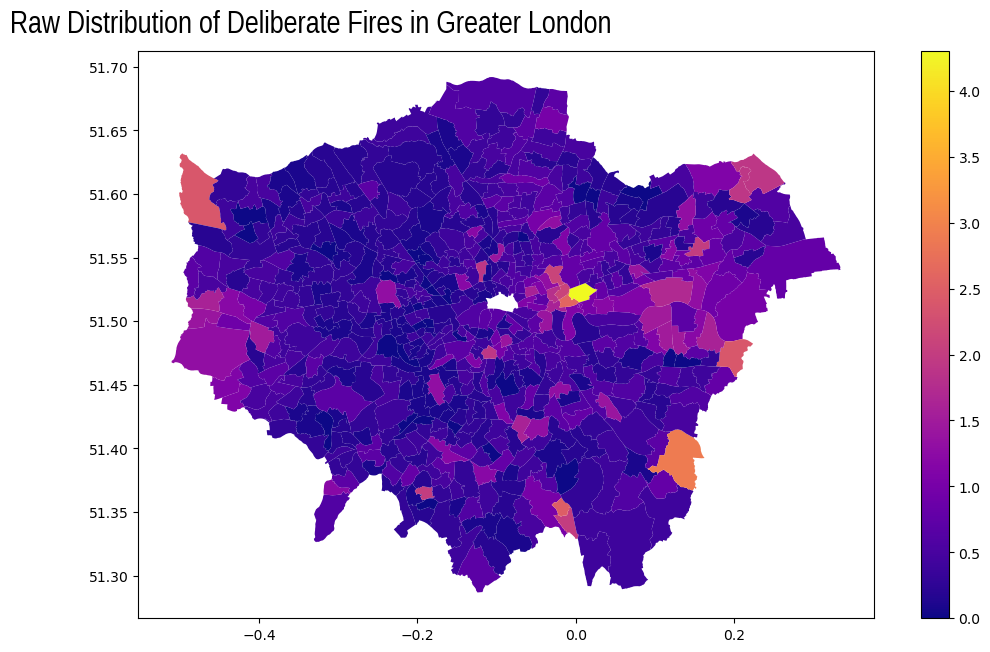

In [20]:
# Plot spatial distribution of deliberate fire in dataframe
# Set configurations of plot
f = plt.figure()
f.set_size_inches(12,7)
tfont = {'fontname':'Liberation Sans Narrow', 'horizontalalignment':'left'}

ax1 = f.add_subplot()
ppd.plot(column='deliberate_fires', legend=True, cmap='plasma', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle(f"Raw Distribution of Deliberate Fires in Greater London", x=0.025, size=22, **tfont);

The graph illustrates the variation in deliberate arson rates across London's wards. North London and a specific ward in East London exhibit notably higher rates, with a noticeable cluster of high values also in West London. The distribution prompts questions about whether similar clustering would occur if socio-economic factors were considered.

* The blank area in the figure represent data gaps resulting from the merger of City of London or not, please refer to Part 3.1 for a detailed explanation.

In [21]:
ppd.columns

Index(['index', 'NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'LB_GSS_CD',
       'BOROUGH', 'POLY_ID', 'geometry', 'ward_name', 'new_code',
       'pop_density', 'employment_number', 'employment_rate', 'house_price',
       'avg_GCSE', 'avg_A_level', 'deliberate_fires'],
      dtype='object')

In [22]:
# Take some target columns out
raw = ppd[['new_code','pop_density','employment_number', 'employment_rate','house_price', 'avg_GCSE', 'avg_A_level', 'deliberate_fires']].set_index('new_code').copy()
raw.head()

,pop_density,employment_number,employment_rate,house_price,avg_GCSE,avg_A_level,deliberate_fires
new_code,,,,,,,
E05000405,1375,5291.0,78.5,315000,321.0,643.4,0.6
E05000414,3962,4993.0,76.2,337195,338.0,714.3,0.7
E05000401,6467,4813.0,74.8,361125,343.0,733.7,0.3
E05000400,3537,4464.0,75.1,404975,353.0,762.2,0.3
E05000402,5447,4807.0,71.6,435000,372.0,761.5,0.7


In [23]:
# Make sure they all numeric data so that can be used in following methods
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 624 entries, E05000405 to E05000037
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pop_density        624 non-null    int64  
 1   employment_number  624 non-null    float64
 2   employment_rate    624 non-null    float64
 3   house_price        624 non-null    int64  
 4   avg_GCSE           624 non-null    float64
 5   avg_A_level        624 non-null    float64
 6   deliberate_fires   624 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 39.0+ KB


**Log transformation**

The histogram reveals that several variables are skewed due to outliers. As deleting ward-specific data isn't viable, we apply logarithmic transformations to address long-tailed distributions by reducing the impact of large values and expanding smaller ones. 

**Box-Cox transformation**

For variables like 'Population density' and 'Housing price', where outliers significantly distort distributions, we use the more adaptable Box-Cox transform to normalise the data and minimise outlier effects, selecting the transform parameter λ for optimal adjustment (Box and Cox, 1964).

Y(λ) = 
\begin{cases} 
\frac{X^λ - 1}{λ}, & \text{if } λ \neq 0 \\
\log(X), & \text{if } λ = 0 
\end{cases}

Where:
- `Y(λ)` is the transformed data.
- `X` is the original data.
- `λ` is the transformation parameter.

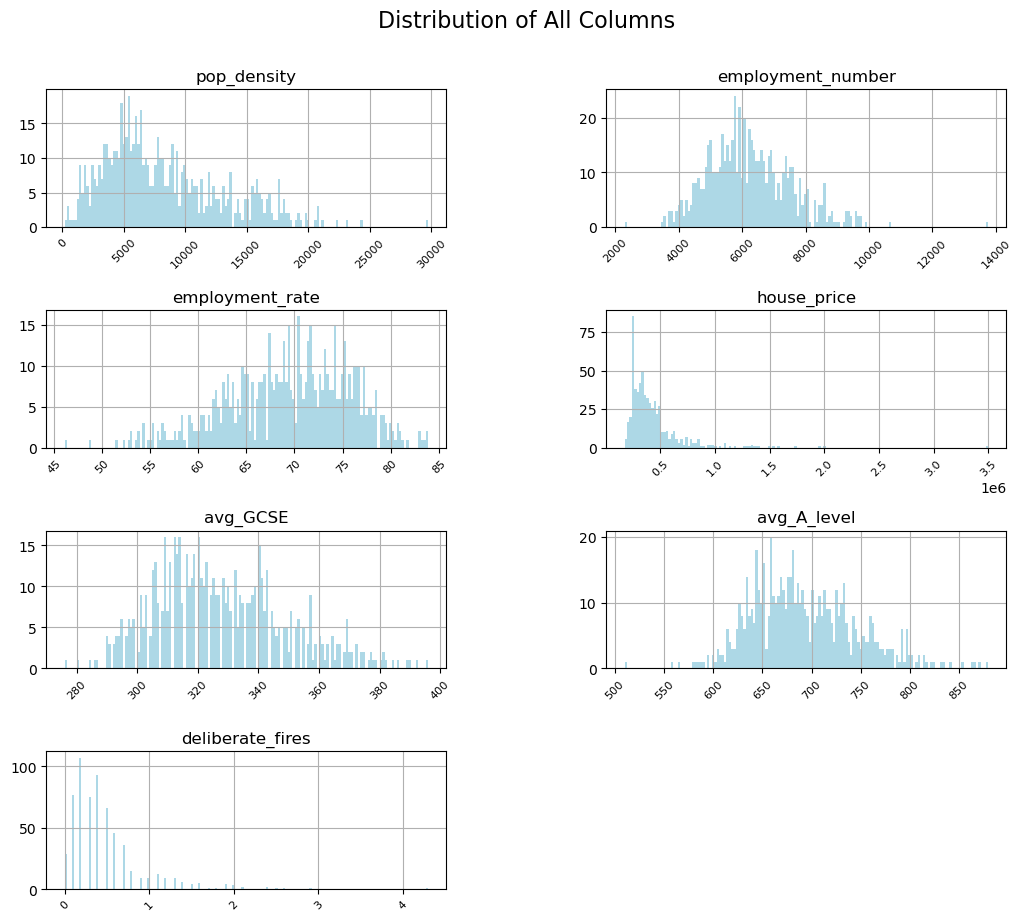

In [24]:
# Plot distribution of all columns
ax = raw.hist(bins=150, layout=(4,2), figsize=(12, 10), color='lightblue')

# Loop through all axes to set x-tick labels rotation
for axis in ax.flatten():
    # Rotate x-tick labels
    for label in axis.get_xticklabels():
        label.set_rotation(45)  # Rotate labels to 45 degrees
        label.set_fontsize(8)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.6)

# Add a title
plt.suptitle('Distribution of All Columns', fontsize=16)
plt.show()

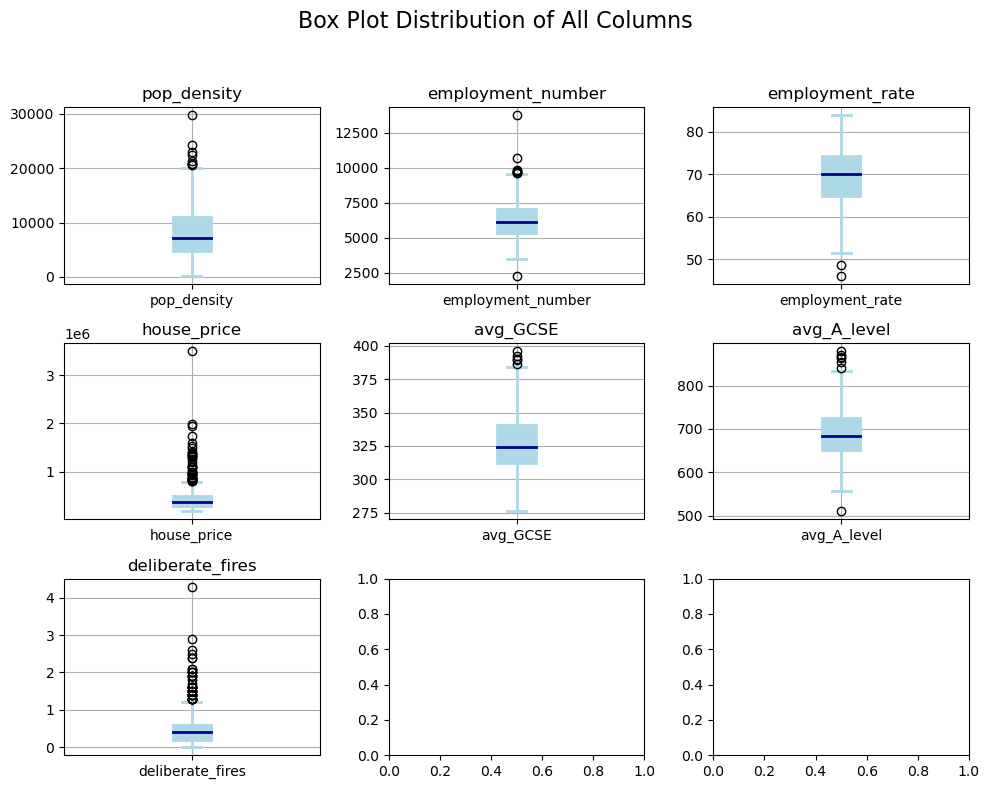

In [25]:
# Set configurations of plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))
axes = axes.flatten()

# Plot box plot for each column
for i, column in enumerate(raw.columns):
    # Set color properties
    boxprops = dict(linestyle='-', linewidth=2, color='lightblue', facecolor='lightblue')
    whiskerprops = dict(linestyle='-', linewidth=2, color='lightblue')
    capprops = dict(linestyle='-', linewidth=2, color='lightblue')
    medianprops = dict(linestyle='-', linewidth=2, color='darkblue') # Typically median is a different color

    # Create boxplot
    raw.boxplot(column=column, ax=axes[i], boxprops=boxprops, whiskerprops=whiskerprops,
                    capprops=capprops, medianprops=medianprops, patch_artist=True)
    axes[i].set_title(column)

# Add a title
plt.suptitle('Box Plot Distribution of All Columns', fontsize=16)

# Adjust layout to avoid overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [26]:
# Becasue the value in all column are >0 or =0.
raw_log = raw.copy()
target_columns_log = ['employment_number', 'employment_rate', 'avg_GCSE', 'avg_A_level']

# Log transformation
raw_log[target_columns_log] = raw_log[target_columns_log].apply(lambda x: np.log(x))  

# Box-Cox transformation
# stats.boxcox requires data must be 1-dimensional, so we have to handle those two columns separately
raw_log['pop_density'], fitted_lambda = stats.boxcox(raw_log['pop_density'])
raw_log['house_price'], fitted_lambda = stats.boxcox(raw_log['house_price'])

raw_log['deliberate_fires'] = raw_log['deliberate_fires']+2.78
raw_log['deliberate_fires'], fitted_lambda = stats.boxcox(raw_log['deliberate_fires'])


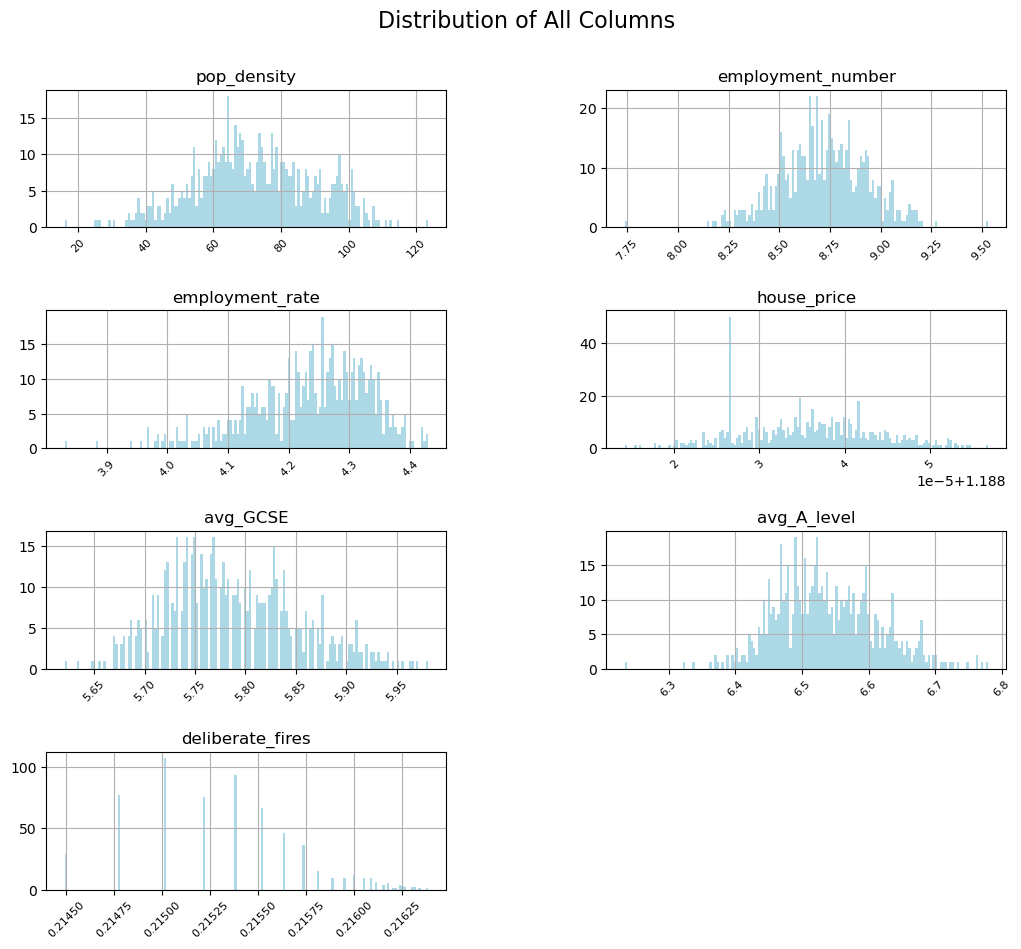

In [27]:
# Plot distribution of all columns after log and box-cox transformation
ax = raw_log.hist(bins=150, layout=(4,2), figsize=(12, 10), color='lightblue')

# Loop through all axes to set x-tick labels rotation
for axis in ax.flatten():
    # Rotate x-tick labels
    for label in axis.get_xticklabels():
        label.set_rotation(45)  # Rotate labels to 45 degrees
        label.set_fontsize(8)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.6)

# Add a title
plt.suptitle('Distribution of All Columns', fontsize=16)
plt.show()

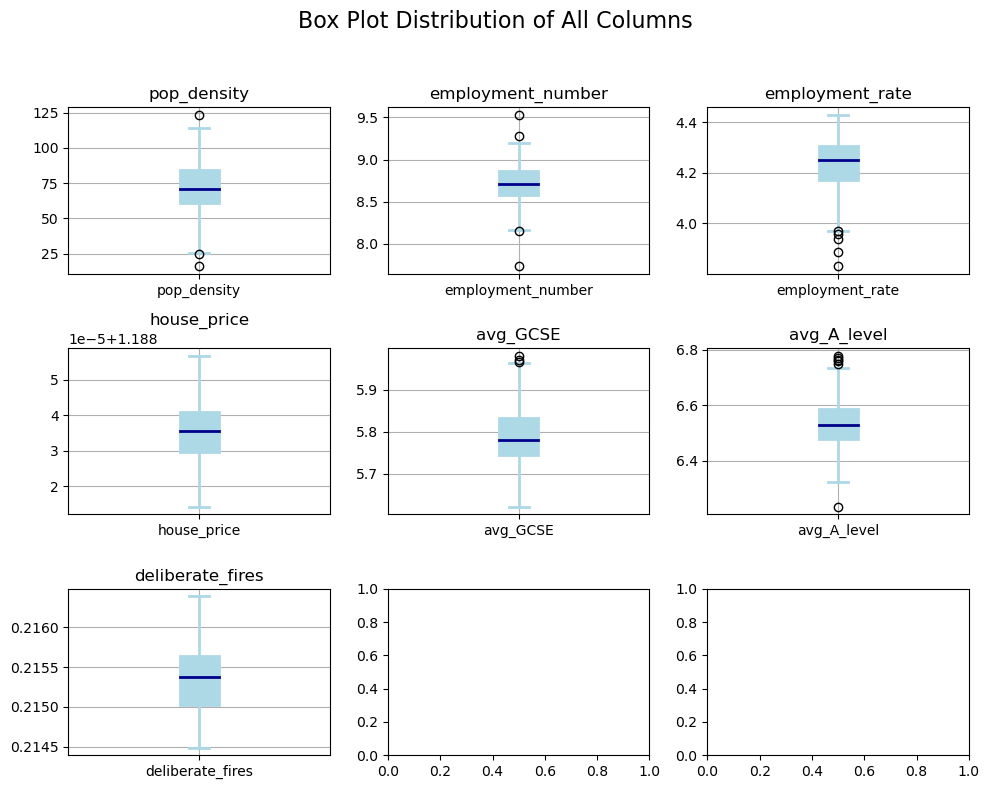

In [28]:
# Set configurations of plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))
axes = axes.flatten()

# Plot box plot for each column
for i, column in enumerate(raw_log.columns):
    # Set color properties
    boxprops = dict(linestyle='-', linewidth=2, color='lightblue', facecolor='lightblue')
    whiskerprops = dict(linestyle='-', linewidth=2, color='lightblue')
    capprops = dict(linestyle='-', linewidth=2, color='lightblue')
    medianprops = dict(linestyle='-', linewidth=2, color='darkblue') # Typically median is a different color

    # Create boxplot
    raw_log.boxplot(column=column, ax=axes[i], boxprops=boxprops, whiskerprops=whiskerprops,
                    capprops=capprops, medianprops=medianprops, patch_artist=True)
    axes[i].set_title(column)

# Add a title
plt.suptitle('Box Plot Distribution of All Columns', fontsize=16)

# Adjust layout to avoid overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Process of outliers**

Based on results from code block 26, the processed variables now approximate a normal distribution. Using boxplots to visually represent each variable's distribution, highlighting the median and outliers. Comparing the boxplots from code block 24 and code block 27, it's evident that most outliers have been effectively transformed to minimise their impact.

### 3.5 Normalisation

The study employs clustering to analyse the relationship between deliberate arson rates and various factors, utilising the unsupervised learning method to automatically form clusters based on data feature similarities. It is crucial to standardise data scales in clustering because if the feature scales vary widely, larger-scaled features might disproportionately influence the results. Normalisation ensures each feature contributes equally to the analysis..


The normalisation method used for the study was RobustScaler, which scales the data by median and quartiles, making the method more stable to outliers (Scikitlearn, 2024). RobustScaler is more robust to outliers and heavy-tailed distributions than StandardScaler, which scales using the mean and standard deviation of the data, and MinMaxScaler, which scales between the minimum and maximum values.

The scaled value `X_scaled` is calculated as:

$$ X_{\text{scaled}} = \frac{X - \text{median}(X)}{\text{IQR}(X)} $$

where:

- `X` is the original data value.
- `median(X)` is the median of the dataset.
- `IQR(X)` is the interquartile range of the dataset.


In [29]:
# Normalise by using IQR and median value to avoid outliers
rs = RobustScaler(quantile_range=(10.0, 90.0))

# Initiate a new dataframe to store change
normed = raw_log.copy()

for c in raw.columns.values:
    normed[c] = rs.fit_transform(raw[c].values.reshape(-1,1))
    print("The range of {} is [{}, {}]".format(c, normed[c].min(), normed[c].max()))
normed.head()

The range of pop_density is [-0.527941966684578, 1.7418822445689717]
The range of employment_number is [-1.1561570674273227, 2.32323845360199]
The range of employment_rate is [-1.4783950617283954, 0.8549382716049377]
The range of house_price is [-0.4321793416572075, 7.120601589103288]
The range of avg_GCSE is [-0.8727272727272727, 1.309090909090909]
The range of avg_A_level is [-1.3302261613691935, 1.497555012224939]
The range of deliberate_fires is [-0.4444444444444445, 4.333333333333333]


,pop_density,employment_number,employment_rate,house_price,avg_GCSE,avg_A_level,deliberate_fires
new_code,,,,,,,
E05000405,-0.436286,-0.246404,0.521605,-0.109818,-0.054545,-0.307916,0.222222
E05000414,-0.237699,-0.336833,0.379630,-0.059432,0.254545,0.233802,0.333333
E05000401,-0.045406,-0.391455,0.293210,-0.005108,0.345455,0.382029,-0.111111
E05000400,-0.270323,-0.497360,0.311728,0.094438,0.527273,0.599786,-0.111111
E05000402,-0.123705,-0.393275,0.095679,0.162599,0.872727,0.594438,0.333333


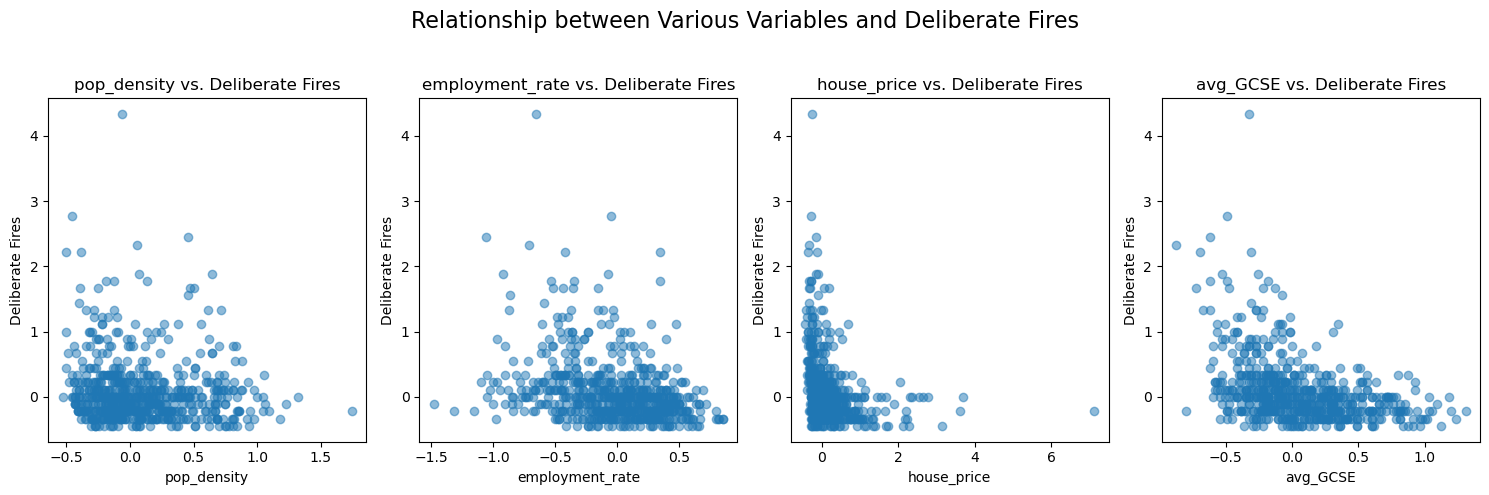

In [30]:
# List all the columns that we want to make scatter polt with deliberate_fires
columns_to_plot = ['pop_density', 'employment_rate', 'house_price', 'avg_GCSE']

# Set configurations of plot
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    plt.scatter(normed[column], normed['deliberate_fires'], alpha=0.5)
    plt.title(f'{column} vs. Deliberate Fires')
    plt.xlabel(column)
    plt.ylabel('Deliberate Fires')

# Add a title
plt.suptitle('Relationship between Various Variables and Deliberate Fires', fontsize=16)

# Adjust layout to avoid overlapping 
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


## 4. Methodology

### 4.1 Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

Due to remaining outliers, the study uses the Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm, which identifies core points (a minimum number within a predefined area size) and expands clusters from these points, classifying non-core points as boundaries.  A number of clusters are obtained based on the density and points that are neither core nor boundary points are considered as noise points. DBSCAN excels in environments with outliers as it does not rely on outlier-sensitive distance measures. However, normalisation is essential since unnormalised features can skew the computation of distances (like Euclidean) and complicate the setting of appropriate domain sizes, thus affecting the clustering's effectiveness.

In [31]:
def mapping_clusters(labels_cluster):
    ppd['cluster_nm'] = labels_cluster
    ppd.plot(column='cluster_nm', categorical=True, legend=True, figsize=(12,8), cmap='Paired');

In [32]:
# Adapted from this tutorial: https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca
def radar_plot_cluster_centroids(df_cluster_centroid):
    # Parameters
    # df_cluster_centroid: a dataframe with rows representing a cluster centroid and columns representing variables
    
    # Add an additional element to both categories and restaurants that’s identical to the first item
    # Manually 'close' the line
    categories = df_cluster_centroid.columns.values.tolist()
    categories = [*categories, categories[0]]
    
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
    
    plt.figure(figsize=(12, 8))
    plt.subplot(polar=True)
    for index, row in df_cluster_centroid.iterrows():
        centroid = row.tolist()
        centroid = [*centroid, centroid[0]]
        label = "Cluster {}".format(index)
        plt.plot(label_loc, centroid, label=label)
    plt.title('Cluster centroid comparison', size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend()
    plt.show()

**Select start epsilon**

K-distance plot was utilised to determine the ε parameter for the DBSCAN algorithm. These plots graph the distance of each point to its Kth nearest neighbor in ascending order. The optimal value of ε is identified at the inflection point of the plot, which indicates a significant change in density and marks the boundary between dense clusters and less dense areas or noise. From the graphical analysis, ε was determined to be 1, effectively distinguishing between clustered points and outliers or noise.

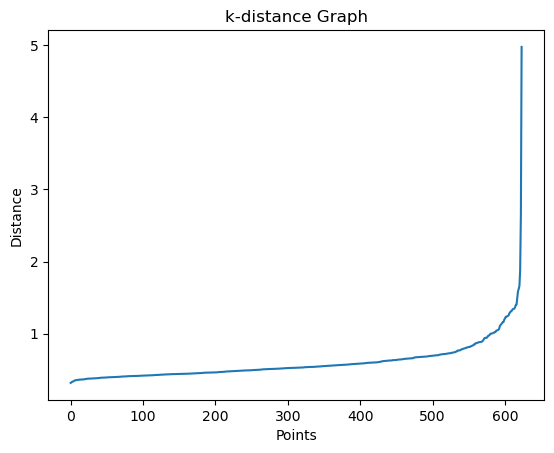

In [33]:
# Apply NearestNeighbors to calculate k-dist
min_samples = 9
neigh = NearestNeighbors(n_neighbors=min_samples)
neigh.fit(normed)
distances, indices = neigh.kneighbors(normed)

# Extract the distance of every point to nearest min_samples
k_dist = distances[:, min_samples-1]

# Plot K-dist figure
plt.plot(np.sort(k_dist))
plt.xlabel('Points')
plt.ylabel('Distance')
plt.title('k-distance Graph')
plt.show()


While DBSCAN effectively handles noisy data, its emphasis on point density can sometimes produce spatially discontinuous clusters. For ward-level clustering, maintaining regional continuity is crucial to avoid fragmented policy-making and to facilitate coordinated responses across adjacent wards, thus enhancing policy effectiveness (Halás et al., 2017). Furthermore, a study from Manila analysing spatial-temporal patterns in fire incidents confirmed geographical correlations in fire occurrence (Bringula & Balahadia, 2018).

### 4.2 Max-P

To address the need for spatial continuity, the Max-P method was adopted. This method starts with a selected point as the center of clustering and incrementally adds adjacent units until a predefined threshold is met. This process is repeated with new centers, potentially followed by iterative optimisation to refine cluster quality, ensuring clusters are geographically contiguous and more aligned with effective policy implementation.

In [34]:
plt.rcParams["figure.figsize"] = [12, 8]
warnings.filterwarnings("ignore")

RANDOM_SEED = 123456

In [35]:
attrs_name = normed.columns.values.tolist()
attrs_name

['pop_density',
 'employment_number',
 'employment_rate',
 'house_price',
 'avg_GCSE',
 'avg_A_level',
 'deliberate_fires']

In [36]:
w = libpysal.weights.Queen.from_dataframe(ppd)

In [37]:
threshold = 0.2 * normed.shape[0]
print(threshold)
camden_copy = normed.copy()
camden_copy["count"] = 1
threshold_name = "count"

124.80000000000001


* Here is the configuration of the computer that was used to run max-p model:
- **Processor**: *2.6 GHz 6-Core Intel Core i7*
- **Graphics**: *Intel UHD Graphics 630 1536 MB*
- **Memory**: *16 GB 2400 MHz DDR4*

**The Following two code chunks are used to run max-p model. They are set to raw chunks because of the long run time (9h 30mins).**

In [ ]:
# This the code that be used for training max-p model

#%%time
#np.random.seed(RANDOM_SEED)
#model = MaxP(camden_copy, w, attrs_name, threshold_name, threshold, top_n=3)
#model.solve()

In [ ]:
# This mode is used to save model as a file

#with open('max_p_model.pkl', 'wb') as file:
#    pickle.dump(model, file)

In [38]:
with open('max_p_model.pkl', 'rb') as file:
    max_p_model = pickle.load(file)

## 5. Restlt and Discussion

### 5.1 Result of DBSCAN

7


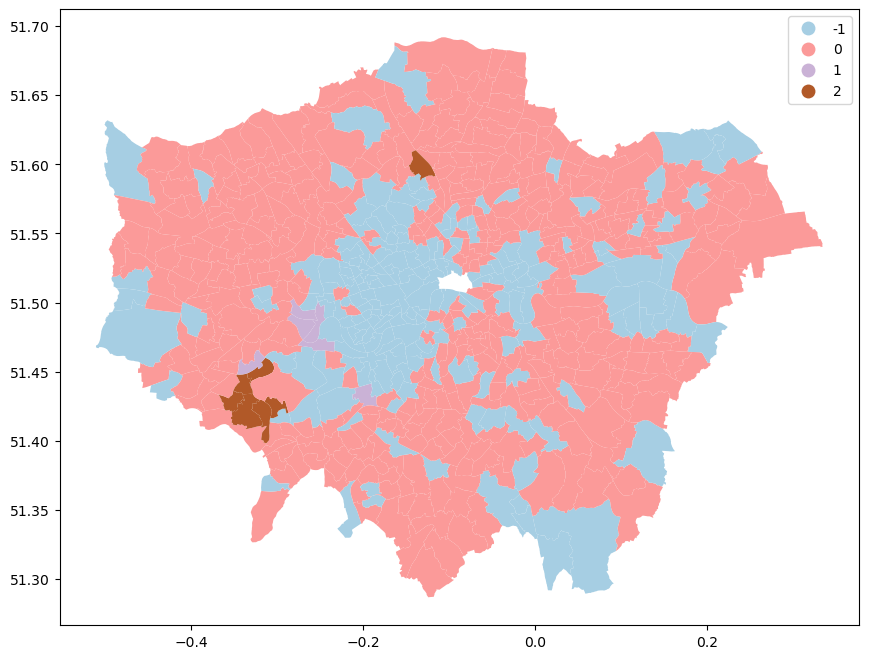

In [39]:
# Find a proper minPts by how may features dataset got
print(normed.shape[1])

# Set minPts as normed.shape[1] + 1 
minPts = 8 

# According to K-dist map, set epsilon=1 first
# Result shows that there only 2 clusters, hence we reduce the minimun distance between clusters
epsilon = 0.5

# Configure hyper parameters using minPts and epsilon, then fit model
dbsc = DBSCAN(eps=epsilon, min_samples=minPts)
dbsc.fit(normed)

# We now have our DBSCAN object created, and we can extract the groups it has identified. We do this using the `.labels_` method.
cluster_nm = dbsc.labels_

# Visualise the result
mapping_clusters(cluster_nm)

This DBSCAN clustering analysis identifies three clusters, with pink areas possibly representing wards with lower intentional arson rates and distinct socio-economic traits, and brown areas indicating outliers, which are wards with unique profiles of arson rates and socio-economic factors.

### 5.2 Evaluation of DBSCAN

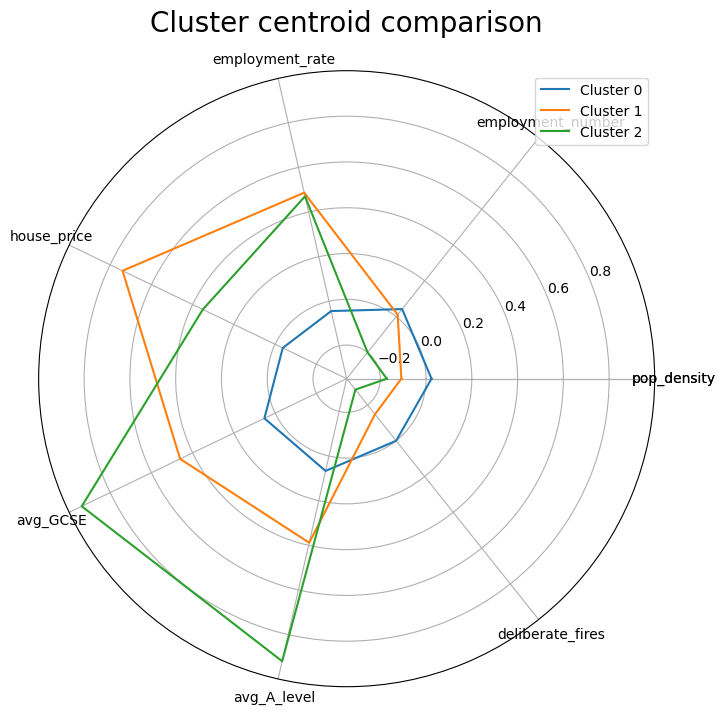

In [40]:
# Initiate a new dataframe to store change
df_dbscan = normed.copy()

# Store result labels
df_dbscan['cluster'] = dbsc.labels_

# Calculate centroids
df_dbscan_centroid = df_dbscan.groupby('cluster').mean()

# drop the outlier
df_dbscan_centroid.drop(-1, inplace=True)

# Plot radar figure via "radar_plot_cluster_centroids" function
radar_plot_cluster_centroids(df_dbscan_centroid)

Radar charts are then employed to delve into the multidimensional relationships and distinct characteristics of each cluster. This detailed comparison aids in assigning targeted policies or interventions to specific clusters locations. Since DBSCAN is an unsupervised learning method for unlabeled data, the silhouette_score is used to evaluate the clustering quality, especially when Homogeneity and Completeness evaluation and SSE are not applicable. The silhouette_score, which ranges from -1 to 1, measures how closely related samples within the same cluster are and how distinct the clusters are from each other; higher values indicate more effective clustering.

In [41]:
# Calculate silhouette score to evaluate performance
metrics.silhouette_score(normed, dbsc.labels_)

0.0025356767522900815

Despite a low silhouette_score of 0.0025 suggesting suboptimal clustering by DBSCAN, the radar chart analysis reveals that wards with higher levels of education and employment tend to have lower rates of intentional arson, offering valuable insights for policy-making.

### 5.3 Result of Max-P

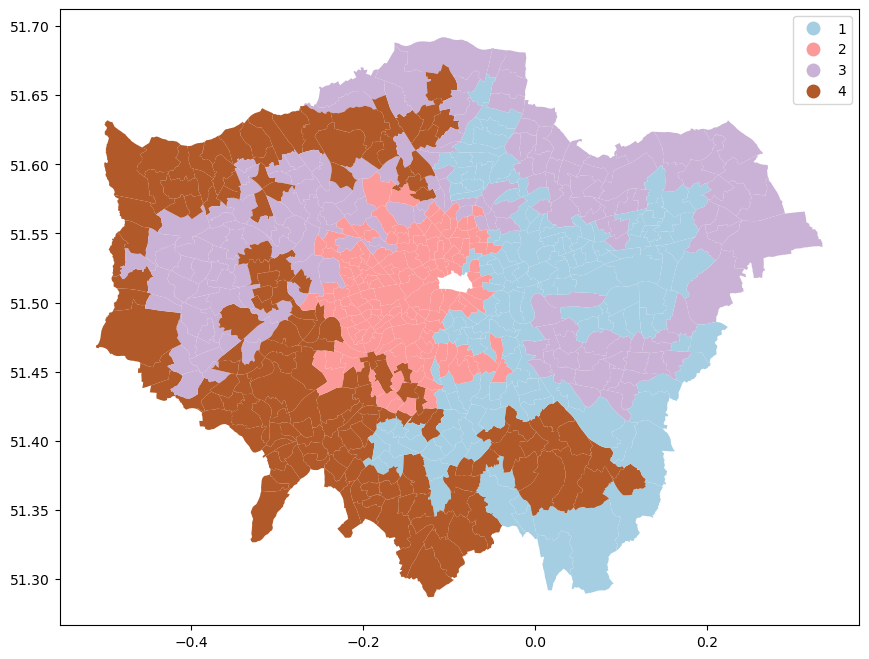

In [42]:
# Visualise the output of Max-p method
ppd['cluster_max_p'] = max_p_model.labels_
ppd.plot(column='cluster_max_p', categorical=True, legend=True, figsize=(12,8), cmap='Paired');

### 5.4 Evaluation of Max-P

In [43]:
camden_copy.head()

,pop_density,employment_number,employment_rate,house_price,avg_GCSE,avg_A_level,deliberate_fires,count
new_code,,,,,,,,
E05000405,-0.436286,-0.246404,0.521605,-0.109818,-0.054545,-0.307916,0.222222,1
E05000414,-0.237699,-0.336833,0.379630,-0.059432,0.254545,0.233802,0.333333,1
E05000401,-0.045406,-0.391455,0.293210,-0.005108,0.345455,0.382029,-0.111111,1
E05000400,-0.270323,-0.497360,0.311728,0.094438,0.527273,0.599786,-0.111111,1
E05000402,-0.123705,-0.393275,0.095679,0.162599,0.872727,0.594438,0.333333,1


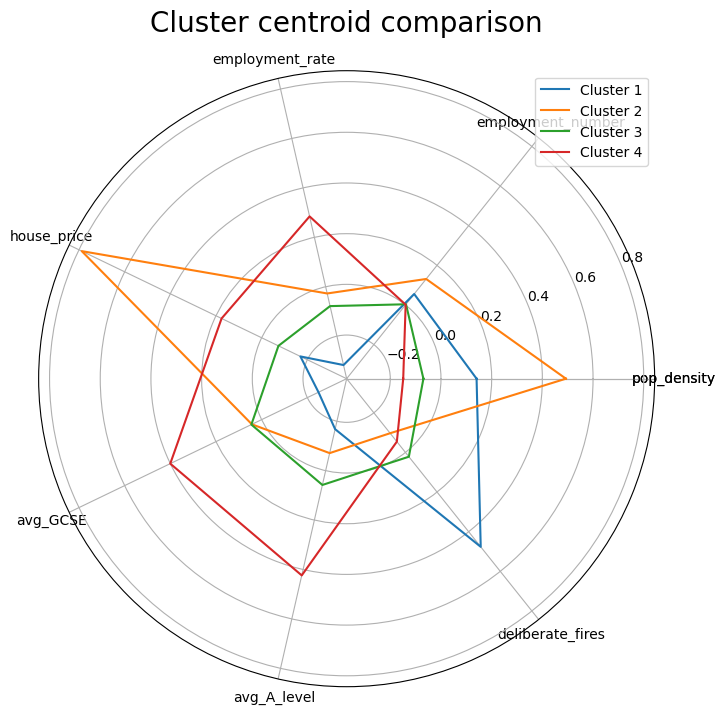

In [44]:
# Initiate a new dataframe to store change
df_max_p = camden_copy.copy()

# Due to Max-p will generate a new column named as "count",
# which will effet quaity of radar plot.
# We need to delete it first
df_max_p = df_max_p.drop('count', axis=1)

# Store result labels
df_max_p['cluster_max_p'] = max_p_model.labels_

# Calculate centroids
df_max_p_centroid = df_max_p.groupby('cluster_max_p').mean()

# Plot radar figure via "radar_plot_cluster_centroids" function
radar_plot_cluster_centroids(df_max_p_centroid)

In [45]:
metrics.silhouette_score(camden_copy, max_p_model.labels_)

0.044681294569631255

The Max-P method, with a silhouette_score of 0.04, proves more effective than DBSCAN in identifying clusters, although the score remains relatively low. This method delineates four distinct clusters, revealing nuanced patterns within the data:

- Cluster 1 exhibits the highest intentional arson rates alongside the lowest education and employment rates, suggesting a strong socio-economic influence on arson behavior.

- Cluster 2, identified as an outlier, shows a low intentional arson rate despite similarly low education and employment rates, diverging from expected trends.

- Clusters 3 and 4 both demonstrate a negative correlation between education and employment levels and intentional arson rates, reinforcing the notion that higher socio-economic status may contribute to lower arson rates.

This analysis underscores the complex interplay between socio-economic factors and intentional arson, offering a refined perspective for targeted interventions and policies.


## 6. Conclusion

In summary, this study highlighted the complex relationship between socio-economic factors and intentional arson rates across wards in London. Using DBSCAN and Max-P clustering techniques, it was found that wards with high levels of employment and education have lower intentional arson rates. Although challenges remain with regard to the quality of clustering, the insights can go some way to informing targeted policy interventions aimed at reducing the incidence of arson, thereby enhancing community safety and economic stability.

**Word Count: 1930**

## 7. Reference List

Barrowcliffe, E.R. and Gannon, T.A. (2015) ‘Comparing the psychological characteristics of un-apprehended firesetters and non-firesetters living in the UK’, *Psychology, Crime &amp; Law*, 22(4), pp. 382–404. doi:10.1080/1068316x.2015.1111365. 

Box, G. E. P. and Cox, D. R. (1964). ‘An analysis of transformations’, *Journal of the Royal Statistical Society*, Series B, 26, 211-252. Available at: https://www.ime.usp.br/~abe/lista/pdfQWaCMboK68.pdf (Accessed: 22 April 2024).

Bringula, R. and Balahadia, F. (2018) ‘A spatiotemporal analysis of fire incidents in Manila from 2011-2016’, *Disaster Prevention and Management: An International Journal*, 28(2), pp. 201–215. doi:10.1108/dpm-05-2018-0147. 

Butler, H. and Gannon, T.A. (2020) ‘Do deliberate firesetters hold fire-related scripts and expertise? A quantitative investigation using fire service personnel as comparisons’, *Psychology, Crime &amp; Law*, 27(4), pp. 383–403. doi:10.1080/1068316x.2020.1808978. 

Communications, A. (2024) *Technical talks: Arson, Arch Insurance*. Available at: https://insurance.archgroup.com/technical-talks-arson/ (Accessed: 22 April 2024). 

Corcoran, J., Higgs, G. and Higginson, A. (2011) ‘Fire incidence in metropolitan areas: A Comparative Study of Brisbane (Australia) and Cardiff (United Kingdom)’, *Applied Geography*, 31(1), pp. 65–75. doi:10.1016/j.apgeog.2010.02.003. 

Federal Emergency Management Agency (1997). *Socioeconomic Factors and the Incidence of Fire*. [pdf] United States Fire Administration, National Fire Data Center. Available at: https://www.usfa.fema.gov/downloads/pdf/statistics/socio.pdf (Accessed: 22 April 2024).

Fire statistics data tables (2022) *GOV.UK*. Available at: https://www.gov.uk/government/statistical-data-sets/fire-statistics-data-tables#deliberate-fires-attended (Accessed: 22 April 2024). 

Ganteaume, A. et al. (2012) ‘A review of the main driving factors of forest fire ignition over Europe’, *Environmental Management*, 51(3), pp. 651–662. doi:10.1007/s00267-012-9961-z. 

Halás, M. et al. (2017) ‘The spatial equity principle in the administrative division of the Central European countries’, *PLOS ONE*, 12(11). doi:10.1371/journal.pone.0187406. 

Johnson, R.S. and Netherton, E. (2017) ‘Fire setting and the impulse-control disorder of pyromania’, *American Journal of Psychiatry Residents’ Journal*, 11(7), pp. 14–16. doi:10.1176/appi.ajp-rj.2016.110707. 

National Fire Chiefs Council (2020). *Arson and Deliberate Fire Reduction Position Statement*. [online] National Fire Chiefs Council. Available at: https://nfcc.org.uk/wp-content/uploads/2023/08/Arson_and_deliberate_firesetting_position_statement.pdf (Accessed 22 Apr 2024).

Scikitlearn (2024) *Sklearn.preprocessing.RobustScaler*. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html (Accessed: 22 April 2024). 

Walsh, D.P. and Lambie, I. (2011) ‘“if he had 40 cents he’d buy matches instead of Lollies”’, *International Journal of Offender Therapy and Comparative Criminology*, 57(1), pp. 71–91. doi:10.1177/0306624x11422224. 